# E-commerce Data Analysis (Python)

Exploratory data analysis of a simulated e-commerce dataset focused on:

- Total revenue and Average Order Value (AOV)
- Performance by product category
- Monthly revenue trend
- New vs returning customers


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

print("Environment ready!")



Environment ready!


In [79]:
import numpy as np
import pandas as pd

np.random.seed(42)


num_orders = 1000


dates = pd.date_range(start="2024-01-01", end="2024-12-31", periods=num_orders)


customers = np.random.randint(1, 201, size=num_orders)


categories = np.random.choice(
    ["Electronics", "Fashion", "Home Decor", "Beauty", "Accessories"],
    size=num_orders
)


values = np.round(np.random.uniform(10, 500, size=num_orders), 2)


qty = np.random.randint(1, 6, size=num_orders)


df = pd.DataFrame({
    "order_date": dates,
    "customer_id": customers,
    "category": categories,
    "order_value": values,
    "quantity": qty
})

df.head()


,order_date,customer_id,category,order_value,quantity
0,2024-01-01 00:00:00.000000000,103,Electronics,420.68,3
1,2024-01-01 08:46:07.567567567,180,Beauty,472.86,2
2,2024-01-01 17:32:15.135135135,93,Home Decor,344.79,1
3,2024-01-02 02:18:22.702702702,15,Fashion,253.62,5
4,2024-01-02 11:04:30.270270270,107,Electronics,312.75,4


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_date   1000 non-null   datetime64[ns]
 1   customer_id  1000 non-null   int64         
 2   category     1000 non-null   object        
 3   order_value  1000 non-null   float64       
 4   quantity     1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 39.2+ KB


In [81]:
total_revenue = df["order_value"].sum()
total_revenue


np.float64(254501.14)

In [82]:
df["month"] = df["order_date"].dt.to_period("M")
df.head()


,order_date,customer_id,category,order_value,quantity,month
0,2024-01-01 00:00:00.000000000,103,Electronics,420.68,3,2024-01
1,2024-01-01 08:46:07.567567567,180,Beauty,472.86,2,2024-01
2,2024-01-01 17:32:15.135135135,93,Home Decor,344.79,1,2024-01
3,2024-01-02 02:18:22.702702702,15,Fashion,253.62,5,2024-01
4,2024-01-02 11:04:30.270270270,107,Electronics,312.75,4,2024-01


In [83]:
revenue_by_month = df.groupby("month")["order_value"].sum()
revenue_by_month


,order_value
month,
2024-01,22518.61
2024-02,19606.84
2024-03,22789.84
2024-04,19892.26
2024-05,22201.26
2024-06,21393.31
2024-07,20344.40
2024-08,22261.73
2024-09,21822.78


In [84]:
revenue_by_month = df.groupby("month")["order_value"].sum().reset_index()
revenue_by_month


,month,order_value
0,2024-01,22518.61
1,2024-02,19606.84
2,2024-03,22789.84
3,2024-04,19892.26
4,2024-05,22201.26
5,2024-06,21393.31
6,2024-07,20344.40
7,2024-08,22261.73
8,2024-09,21822.78
9,2024-10,22687.20


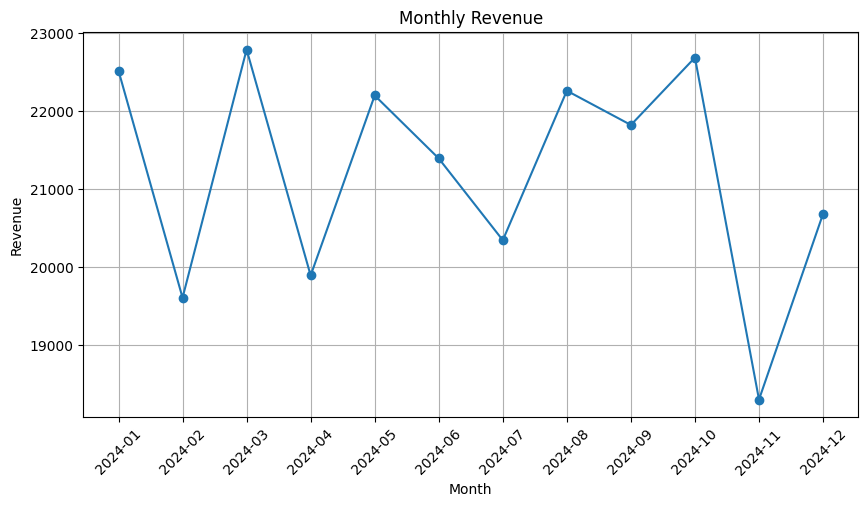

In [85]:
plt.figure(figsize=(10,5))
plt.plot(revenue_by_month["month"].astype(str), revenue_by_month["order_value"], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()


In [86]:
revenue_by_category = df.groupby("category")["order_value"].sum().reset_index()
revenue_by_category


,category,order_value
0,Accessories,53437.92
1,Beauty,46862.78
2,Electronics,51177.66
3,Fashion,51943.08
4,Home Decor,51079.70


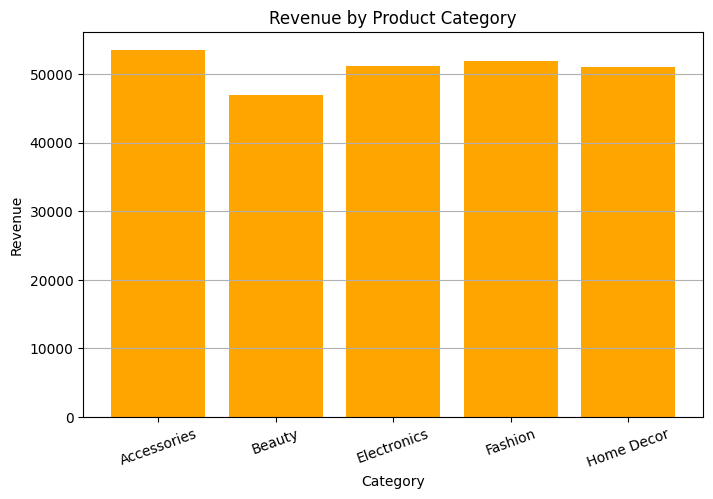

In [87]:
plt.figure(figsize=(8,5))
plt.bar(revenue_by_category["category"], revenue_by_category["order_value"], color="orange")
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.xticks(rotation=20)
plt.grid(axis='y')
plt.show()


Insight:

The Fashion category has the highest average order value (AOV) in the e-commerce dataset, followed closely by Accessories and Home Decor.

Beauty, on the other hand, shows the lowest AOV, suggesting that products in this category tend to be lower priced compared with the others.

Even so, the differences between categories are moderate, indicating a relatively consistent pricing structure across the store.

Recommended action:

Campaigns focused on Fashion and Accessories may generate higher financial return per order due to their higher AOV.

Meanwhile, in Beauty, promotions that increase sales volume may be more effective for growing total revenue.


In [88]:
aov_by_category = df.groupby("category")["order_value"].mean().reset_index()
aov_by_category


,category,order_value
0,Accessories,259.407379
1,Beauty,244.076979
2,Electronics,253.354752
3,Fashion,259.715400
4,Home Decor,255.398500


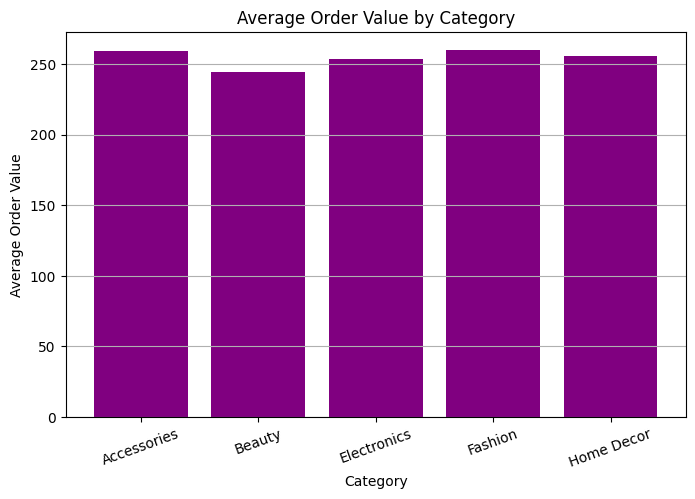

In [89]:
plt.figure(figsize=(8,5))
plt.bar(aov_by_category["category"], aov_by_category["order_value"], color="purple")
plt.title("Average Order Value by Category")
plt.xlabel("Category")
plt.ylabel("Average Order Value")
plt.xticks(rotation=20)
plt.grid(axis='y')
plt.show()


Insight:

The Fashion category shows the highest average order value (≈ 259.7), followed closely by Accessories and Home Decor.

Beauty has the lowest average order value (≈ 244.1), which suggests that products in this category tend to be more affordable compared with the others.

Although the differences are relatively small, categories such as Fashion and Accessories appear to work with higher-value orders on average.

In contrast, Beauty may be more associated with lower-value purchases — possibly replenishment or lower-margin items.

Recommendation:

• campaigns that increase sales volume in Beauty may generate proportional revenue growth

• while in Fashion and Accessories, conversion-focused promotions may have greater financial impact per transaction


In [90]:
orders_per_customer = df.groupby("customer_id")["order_value"].count().reset_index()
orders_per_customer.columns = ["customer_id", "order_count"]
orders_per_customer.head()


,customer_id,order_count
0,1,8
1,2,5
2,3,6
3,4,4
4,5,6


In [91]:
orders_per_customer["customer_type"] = np.where(
    orders_per_customer["order_count"] == 1,
    "New",
    "Returning"
)

orders_per_customer.head()


,customer_id,order_count,customer_type
0,1,8,Returning
1,2,5,Returning
2,3,6,Returning
3,4,4,Returning
4,5,6,Returning


In [92]:
customer_split = orders_per_customer["customer_type"].value_counts()
customer_split


,count
customer_type,
Returning,192
New,6


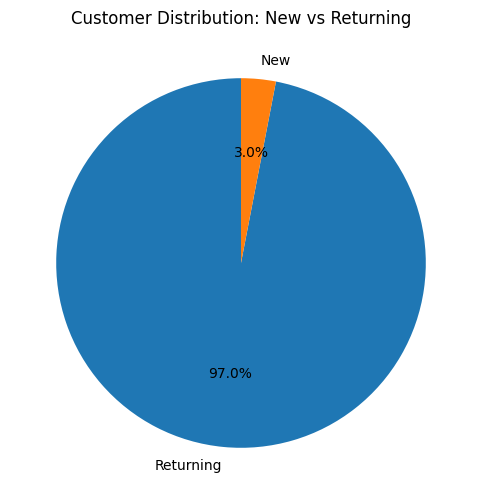

In [93]:
plt.figure(figsize=(6,6))
plt.pie(customer_split,
        labels=customer_split.index,
        autopct="%1.1f%%",
        startangle=90)
plt.title("Customer Distribution: New vs Returning")
plt.show()


Returning customers represent approximately 97% of the active customer base, demonstrating strong retention and brand loyalty. However, only around 3% of customers are new, which suggests a clear growth opportunity through initiatives focused on customer acquisition.


In [94]:
total_revenue = df["order_value"].sum()
aov = df["order_value"].mean()
total_customers = df["customer_id"].nunique()

returning_count = orders_per_customer[orders_per_customer["customer_type"]=="Returning"].shape[0]
new_count = orders_per_customer[orders_per_customer["customer_type"]=="New"].shape[0]

returning_pct = (returning_count / (returning_count + new_count)) * 100
new_pct = (new_count / (returning_count + new_count)) * 100

print("===== KEY METRICS =====")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average Order Value: ${aov:,.2f}")
print(f"Unique Customers: {total_customers}")
print(f"Returning Customers: {returning_pct:.1f}%")
print(f"New Customers: {new_pct:.1f}%")


===== KEY METRICS =====
Total Revenue: $254,501.14
Average Order Value: $254.50
Unique Customers: 198
Returning Customers: 97.0%
New Customers: 3.0%


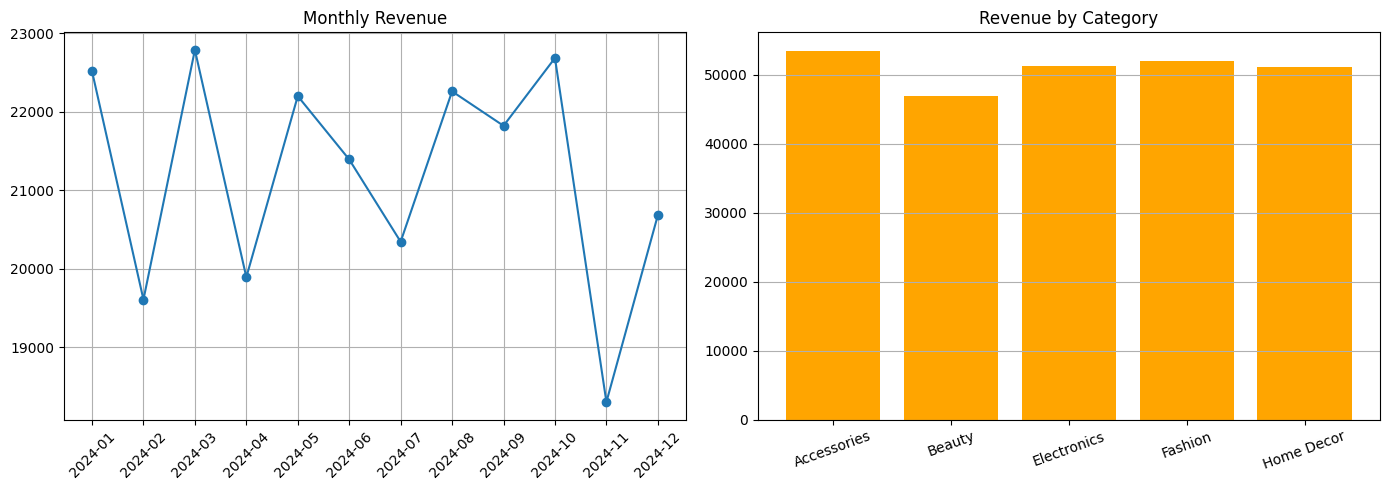

In [95]:
plt.figure(figsize=(14,5))

# Figure 1 — Monthly Revenue
plt.subplot(1,2,1)
plt.plot(revenue_by_month["month"].astype(str), revenue_by_month["order_value"], marker='o')
plt.title("Monthly Revenue")
plt.xticks(rotation=45)
plt.grid(True)

# Figure 2 — Revenue by Category
plt.subplot(1,2,2)
plt.bar(revenue_by_category["category"], revenue_by_category["order_value"], color="orange")
plt.title("Revenue by Category")
plt.xticks(rotation=20)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [96]:
df.to_csv("ecommerce_data.csv", index=False)
